In [1]:
# Mengimpor library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur agar plot ditampilkan di notebook
%matplotlib inline

# Memuat dataset
# Kita menggunakan sep=';' karena pemisah dalam file CSV adalah titik koma
try:
    df = pd.read_csv('data.csv', sep=';')
    print("Dataset berhasil dimuat!")
except FileNotFoundError:
    print("Error: Pastikan file 'data.csv' berada di direktori yang sama dengan notebook Anda.")

# Menampilkan 5 baris pertama dari data untuk mendapatkan gambaran awal
print("5 baris pertama data:")
df.head()

# Menampilkan informasi ringkas tentang DataFrame
# Ini termasuk jumlah entri, jumlah kolom, nama kolom, jumlah nilai non-null, dan tipe data setiap kolom
print("Informasi Dataset:")
df.info()

print("\n" + "="*50 + "\n") # Pemisah untuk keterbacaan

# Menampilkan statistik deskriptif untuk kolom numerik
# Ini termasuk hitungan, rata-rata, standar deviasi, nilai minimum, kuartil, dan nilai maksimum
print("Statistik Deskriptif untuk Kolom Numerik:")
df.describe()

# Menghitung jumlah nilai yang hilang (missing values) di setiap kolom
print("Jumlah Nilai yang Hilang di Setiap Kolom:")
print(df.isnull().sum())

print("\n" + "="*50 + "\n")

# Memeriksa jumlah baris data yang terduplikasi
print(f"Jumlah Baris Duplikat: {df.duplicated().sum()}")

Dataset berhasil dimuat!
5 baris pertama data:
Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9

C:\Users\Pongo\AppData\Local\Temp\ipykernel_16216\3311692526.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Status', data=df, palette='viridis')


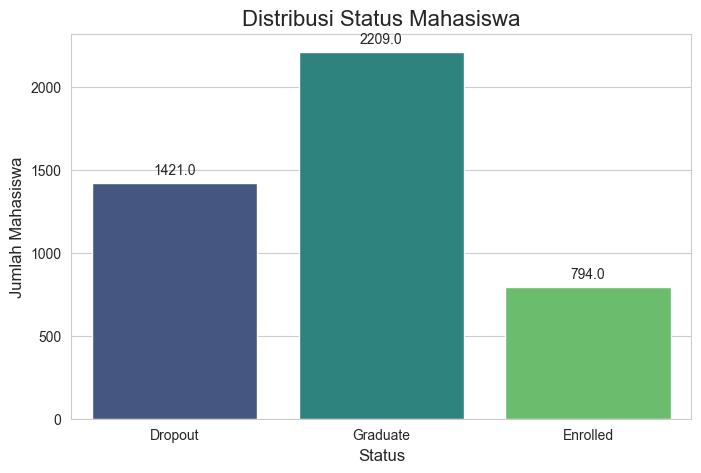

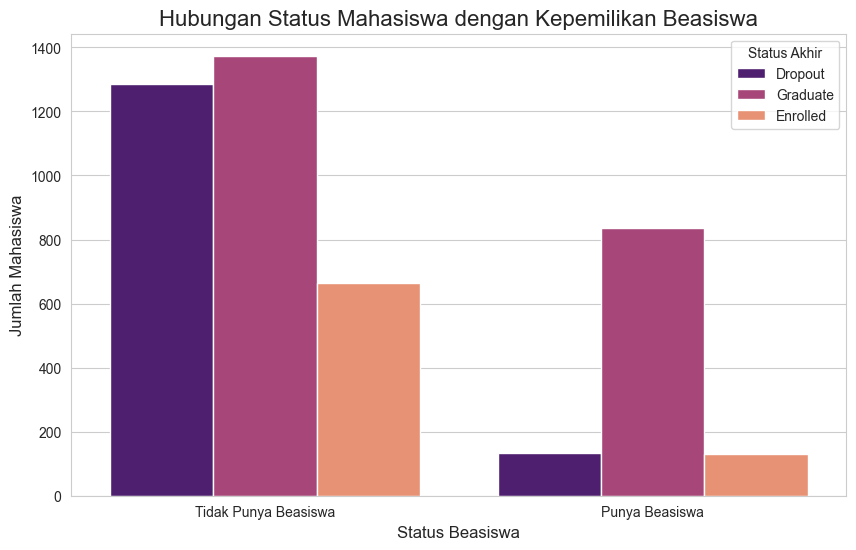

C:\Users\Pongo\AppData\Local\Temp\ipykernel_16216\3311692526.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Status', y='Age_at_enrollment', data=df, palette='coolwarm')


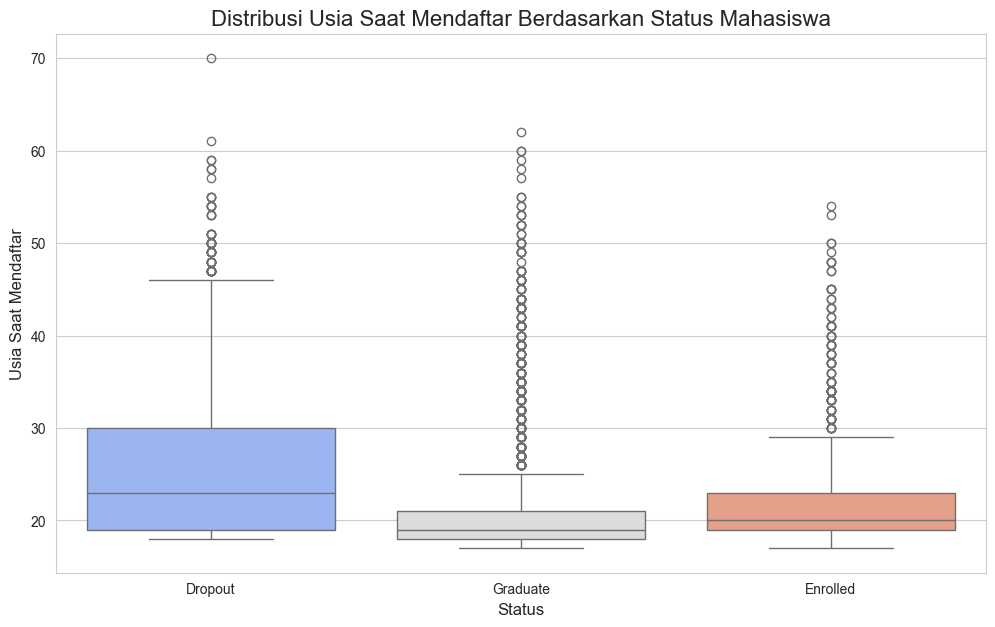

C:\Users\Pongo\AppData\Local\Temp\ipykernel_16216\3311692526.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Status', y='Age_at_enrollment', data=df, palette='coolwarm')


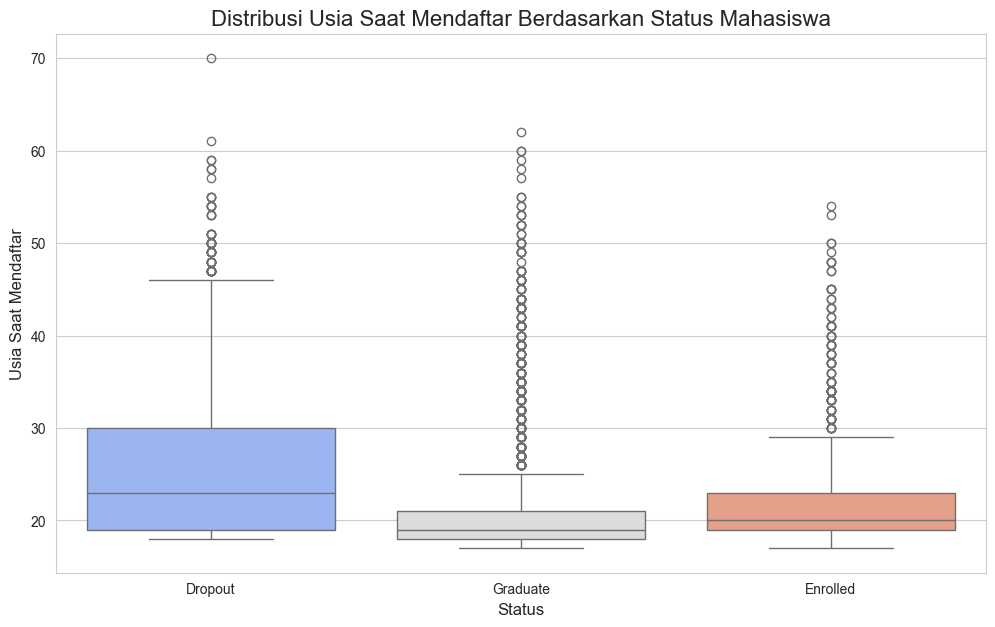

In [2]:
# Mengatur gaya plot agar lebih menarik
sns.set_style('whitegrid')
plt.figure(figsize=(8, 5)) # Mengatur ukuran gambar

# Membuat count plot untuk melihat distribusi variabel 'Status'
ax = sns.countplot(x='Status', data=df, palette='viridis')

# Menambahkan judul dan label
plt.title('Distribusi Status Mahasiswa', fontsize=16)
plt.xlabel('Status', fontsize=12)
plt.ylabel('Jumlah Mahasiswa', fontsize=12)

# Menambahkan label jumlah di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.show()

plt.figure(figsize=(10, 6))

# Membuat count plot dengan 'Scholarship_holder' di sumbu x dan diwarnai berdasarkan 'Status'
sns.countplot(x='Scholarship_holder', hue='Status', data=df, palette='magma')

# Mengubah label sumbu x agar lebih deskriptif
plt.xticks(ticks=[0, 1], labels=['Tidak Punya Beasiswa', 'Punya Beasiswa'])

plt.title('Hubungan Status Mahasiswa dengan Kepemilikan Beasiswa', fontsize=16)
plt.xlabel('Status Beasiswa', fontsize=12)
plt.ylabel('Jumlah Mahasiswa', fontsize=12)
plt.legend(title='Status Akhir')
plt.show()

plt.figure(figsize=(12, 7))

# Membuat box plot untuk melihat distribusi 'Age_at_enrollment' untuk setiap 'Status'
sns.boxplot(x='Status', y='Age_at_enrollment', data=df, palette='coolwarm')

plt.title('Distribusi Usia Saat Mendaftar Berdasarkan Status Mahasiswa', fontsize=16)
plt.xlabel('Status', fontsize=12)
plt.ylabel('Usia Saat Mendaftar', fontsize=12)
plt.show()

plt.figure(figsize=(12, 7))

# Membuat box plot untuk melihat distribusi 'Age_at_enrollment' untuk setiap 'Status'
sns.boxplot(x='Status', y='Age_at_enrollment', data=df, palette='coolwarm')

plt.title('Distribusi Usia Saat Mendaftar Berdasarkan Status Mahasiswa', fontsize=16)
plt.xlabel('Status', fontsize=12)
plt.ylabel('Usia Saat Mendaftar', fontsize=12)
plt.show()

In [3]:
# Memisahkan fitur (X) dan target (y)
# X berisi semua kolom kecuali 'Status'
X = df.drop('Status', axis=1)

# y hanya berisi kolom 'Status'
y = df['Status']

# Menampilkan 5 baris pertama dari fitur dan target untuk verifikasi
print("Fitur (X) 5 baris pertama:")
display(X.head())

print("\nTarget (y) 5 baris pertama:")
display(y.head())

from sklearn.preprocessing import LabelEncoder

# Membuat instance dari LabelEncoder
le = LabelEncoder()

# Melakukan encoding pada variabel target y
y_encoded = le.fit_transform(y)

# Menampilkan hasil encoding untuk beberapa nilai pertama
print("Label Asli:", y.unique())
print("Hasil Encoding:", np.unique(y_encoded))
print("Mapping (Urutan bisa berbeda):")
for i, label in enumerate(le.classes_):
    print(f"- {label}: {i}")

# Kita akan menggunakan y_encoded untuk langkah selanjutnya
y = y_encoded

from sklearn.model_selection import train_test_split

# Membagi data menjadi 80% data latih dan 20% data uji
# stratify=y memastikan proporsi setiap kelas di target sama di data latih dan uji
# random_state=42 memastikan hasil pembagian data selalu sama setiap kali kode dijalankan
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Menampilkan ukuran dari masing-masing set data
print(f"Ukuran X_train: {X_train.shape}")
print(f"Ukuran X_test: {X_test.shape}")
print(f"Ukuran y_train: {y_train.shape}")
print(f"Ukuran y_test: {y_test.shape}")

Fitur (X) 5 baris pertama:


,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79



Target (y) 5 baris pertama:


0     Dropout
1    Graduate
2     Dropout
3    Graduate
4    Graduate
Name: Status, dtype: object

Label Asli: ['Dropout' 'Graduate' 'Enrolled']
Hasil Encoding: [0 1 2]
Mapping (Urutan bisa berbeda):
- Dropout: 0
- Enrolled: 1
- Graduate: 2
Ukuran X_train: (3539, 36)
Ukuran X_test: (885, 36)
Ukuran y_train: (3539,)
Ukuran y_test: (885,)


Model Logistic Regression berhasil dilatih!
Akurasi Model: 0.7684

Laporan Klasifikasi:
              precision    recall  f1-score   support

     Dropout       0.79      0.77      0.78       284
    Enrolled       0.52      0.33      0.41       159
    Graduate       0.80      0.93      0.86       442

    accuracy                           0.77       885
   macro avg       0.71      0.68      0.68       885
weighted avg       0.75      0.77      0.75       885


Confusion Matrix:


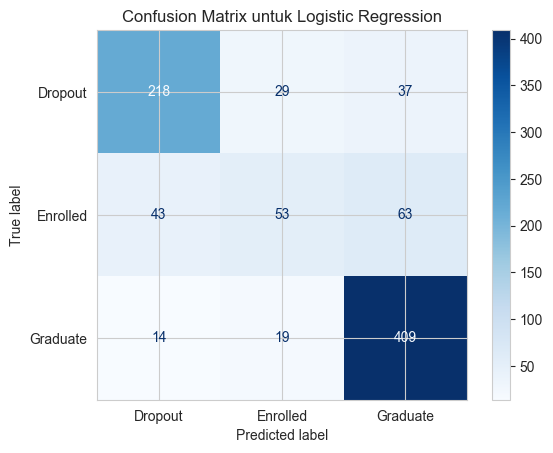

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# 1. Membuat instance StandardScaler
scaler = StandardScaler()

# 2. Melakukan standardisasi pada data latih dan uji
# Kita menggunakan fit_transform pada data latih untuk mempelajari parameter scaling
X_train_scaled = scaler.fit_transform(X_train)

# Kita hanya menggunakan transform pada data uji dengan parameter dari data latih
X_test_scaled = scaler.transform(X_test)

# 3. Membuat dan melatih model Logistic Regression
# `max_iter` ditingkatkan untuk memastikan konvergensi model
model_lr = LogisticRegression(random_state=42, max_iter=1000)
model_lr.fit(X_train_scaled, y_train)

print("Model Logistic Regression berhasil dilatih!")

# 1. Membuat prediksi pada data uji
y_pred = model_lr.predict(X_test_scaled)

# 2. Mengevaluasi performa model
# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy:.4f}")

# Menampilkan classification report (precision, recall, f1-score)
print("\nLaporan Klasifikasi:")
# Menggunakan `le.classes_` untuk mendapatkan nama label asli
print(classification_report(y_test, y_pred, target_names=le.classes_))

# 3. Menampilkan Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix untuk Logistic Regression')
plt.show()

Melatih model Random Forest...
Model Random Forest berhasil dilatih!

--- Hasil Evaluasi Model Random Forest ---
Akurasi Model: 0.7638

Laporan Klasifikasi:
              precision    recall  f1-score   support

     Dropout       0.80      0.75      0.77       284
    Enrolled       0.56      0.35      0.43       159
    Graduate       0.78      0.92      0.85       442

    accuracy                           0.76       885
   macro avg       0.71      0.67      0.68       885
weighted avg       0.75      0.76      0.75       885


Confusion Matrix:


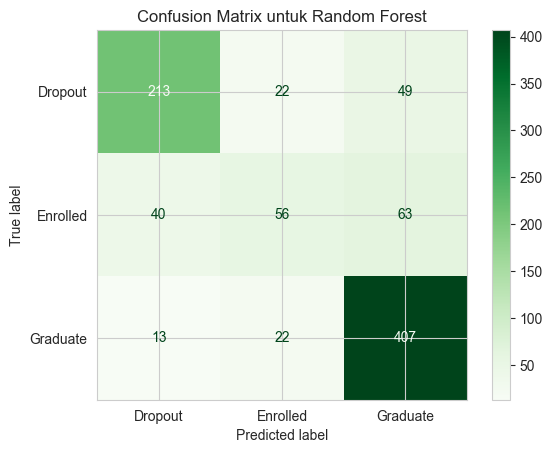

In [5]:
from sklearn.ensemble import RandomForestClassifier

# 1. Membuat dan melatih model Random Forest
# n_estimators adalah jumlah "pohon" dalam "hutan"
# random_state=42 untuk hasil yang konsisten
print("Melatih model Random Forest...")
model_rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Kita bisa menggunakan data yang sudah di-scale atau yang belum.
# Random Forest tidak sensitif terhadap skala fitur, tapi kita gunakan saja yang sudah di-scale.
model_rf.fit(X_train_scaled, y_train)
print("Model Random Forest berhasil dilatih!")

# 2. Membuat prediksi pada data uji
y_pred_rf = model_rf.predict(X_test_scaled)

# 3. Mengevaluasi performa model Random Forest
print("\n--- Hasil Evaluasi Model Random Forest ---")
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Akurasi Model: {accuracy_rf:.4f}")

print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

# 4. Menampilkan Confusion Matrix untuk Random Forest
print("\nConfusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=le.classes_)
disp_rf.plot(cmap='Greens')
plt.title('Confusion Matrix untuk Random Forest')
plt.show()

C:\Users\Pongo\AppData\Local\Temp\ipykernel_16216\2713079767.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_15_features, y=top_15_features.index, palette='plasma')


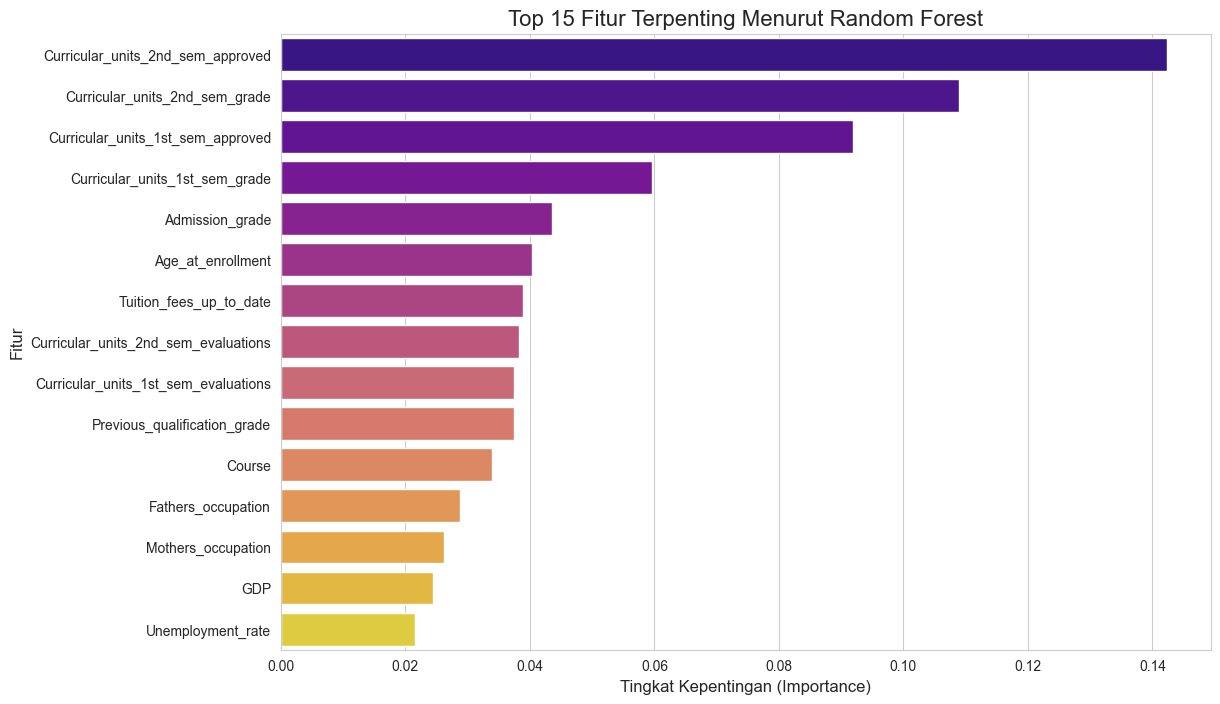

Model, scaler, dan label encoder berhasil disimpan di dalam folder 'model/'.


In [6]:
# Membuat series pandas untuk feature importances
importances = pd.Series(model_rf.feature_importances_, index=X.columns)

# Mengurutkan fitur dari yang paling penting
top_15_features = importances.sort_values(ascending=False).head(15)

# Membuat plot
plt.figure(figsize=(12, 8))
sns.barplot(x=top_15_features, y=top_15_features.index, palette='plasma')
plt.title('Top 15 Fitur Terpenting Menurut Random Forest', fontsize=16)
plt.xlabel('Tingkat Kepentingan (Importance)', fontsize=12)
plt.ylabel('Fitur', fontsize=12)
plt.show()

import joblib

# Membuat direktori 'model' jika belum ada
import os
os.makedirs('model', exist_ok=True)

# Menyimpan model Random Forest
joblib.dump(model_rf, 'model/model_rf.pkl')

# Menyimpan scaler
joblib.dump(scaler, 'model/scaler.pkl')

# Menyimpan label encoder
joblib.dump(le, 'model/label_encoder.pkl')


print("Model, scaler, dan label encoder berhasil disimpan di dalam folder 'model/'.")

# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Muhammad Ashim Izzuddin
- Email: muhammadashimizzuddin@gmail.com
- Id Dicoding: ashim_izzuddin

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
# --- 1.0 Impor Library ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


### Menyiapkan data yang akan diguankan

In [ ]:
# --- 1.1 Memuat Data ---

try:
    df = pd.read_csv('data.csv', sep=';')
    print("✅ Dataset berhasil dimuat!")
except FileNotFoundError:
    print("❌ File data.csv tidak ditemukan. Pastikan path file sudah benar.")

## Data Understanding

In [ ]:
# --- 1.2 Eksplorasi Data Awal ---

if 'df' in locals():
    print("\n### 1.2 Informasi Awal Dataset ###")

    # Menampilkan 5 baris pertama data untuk melihat sampel
    print("\n[INFO] Lima baris pertama data:")
    print(df.head())

    # Menampilkan dimensi data (jumlah baris dan kolom)
    print(f"\n[INFO] Dimensi data: {df.shape[0]} baris dan {df.shape[1]} kolom.")

    # Menampilkan informasi ringkas, termasuk tipe data dan nilai non-null
    print("\n[INFO] Tipe Data dan Nilai Non-Null Awal:")
    df.info()

    # Menampilkan ringkasan statistik untuk kolom numerik
    print("\n[INFO] Statistik Deskriptif (Kolom Numerik):")
    print(df.describe())

    # Menampilkan distribusi untuk kolom target 'Status'
    print("\n[INFO] Distribusi Kolom 'Status':")
    print(df['Status'].value_counts())
    print("\n[INFO] Persentase Distribusi Kolom 'Status':")
    print(df['Status'].value_counts(normalize=True) * 100)

## Data Preparation / Preprocessing

In [ ]:
 # --- 2.1 Standarisasi Nama Kolom ---
print("\n--- 2.1 Menjalankan standarisasi nama kolom ---")
df.columns = df.columns.str.lower().str.replace(' ', '_')
print("✅ Nama kolom berhasil diseragamkan (lowercase dan underscore).")

# --- 2.2 Memperbaiki Tipe Data Kolom ---
print("\n--- 2.2 Memperbaiki tipe data kolom numerik yang terbaca sebagai object ---")
# Daftar kolom yang seharusnya numerik berdasarkan analisis awal
cols_to_numeric = [
    'curricular_units_1st_sem_grade',
    'curricular_units_2nd_sem_grade',
    'admission_grade',
    'unemployment_rate',
    'inflation_rate',
    'gdp'
]

for col in cols_to_numeric:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
print("✅ Tipe data kolom numerik telah diproses.")

# --- 2.3 Menangani Nilai Kosong (Imputation) ---
print("\n--- 2.3 Menangani nilai kosong (NaN) yang muncul setelah perbaikan tipe data ---")
# Cek jumlah nilai NaN yang muncul setelah konversi paksa
print("\n[INFO] Jumlah nilai kosong SEBELUM imputasi:")
print(df[cols_to_numeric].isnull().sum())

# Kolom yang akan diimputasi (hanya yang memiliki NaN)
cols_to_impute = ['curricular_units_1st_sem_grade', 'curricular_units_2nd_sem_grade']

for col in cols_to_impute:
    if col in df.columns:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"Nilai kosong di '{col}' diisi dengan median: {median_val}")

print("\n[INFO] Jumlah nilai kosong SETELAH imputasi:")
print(df[cols_to_impute].isnull().sum())
print("✅ Proses imputasi nilai kosong selesai.")

# --- 2.4 Membuat Kolom Target Biner ---
print("\n--- 2.4 Membuat kolom target biner 'output_label' ---")
df['output_label'] = df['status'].apply(lambda x: 1 if x == 'Dropout' else 0)
print("✅ Kolom 'output_label' berhasil dibuat (1: Dropout, 0: Non-Dropout).")
print("\n[INFO] Contoh hasil pemetaan 'status' ke 'output_label':")
print(df[['status', 'output_label']].head())

# --- 2.5 Pemeriksaan Final ---
print("\n--- 2.5 Info Dataframe Final Setelah Persiapan ---")
# Menampilkan informasi ringkas dari dataframe yang sudah bersih untuk verifikasi akhir
df.info()
print("\n\n✅ Tahap 2 Selesai! Data sekarang bersih dan siap untuk dianalisis lebih lanjut.")

## Analisis Data Eksploratif (EDA)

In [ ]:
# --- 3.1 Ringkasan Numerik Berdasarkan Status Dropout ---
print("\n--- 3.1 Membandingkan rata-rata fitur numerik berdasarkan status dropout ---")
comparison_df = df.groupby('output_label').mean(numeric_only=True).T
print(comparison_df)

# --- 3.2 Visualisasi Data ---
print("\n--- 3.2 Membuat Visualisasi Data ---")

# 1. Distribusi Target Variabel
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='status', data=df, palette='viridis')
plt.title('Distribusi Status Mahasiswa (Dropout, Enrolled, Graduate)', fontsize=16)
plt.xlabel('Status', fontsize=12)
plt.ylabel('Jumlah Mahasiswa', fontsize=12)
# Menambahkan label angka di atas bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

# 2. Pengaruh Status Pembayaran UKT (Tuition Fees)
plt.figure(figsize=(10, 7))
sns.countplot(data=df, x='tuition_fees_up_to_date', hue='status', palette='pastel')
plt.title('Pengaruh Status Pembayaran UKT terhadap Status Mahasiswa', fontsize=16)
plt.xlabel('UKT Lunas (1: Ya, 0: Tidak)', fontsize=12)
plt.ylabel('Jumlah Mahasiswa', fontsize=12)
plt.legend(title='Status Akhir')
plt.show()

# 3. Pengaruh Usia Saat Masuk Kuliah
plt.figure(figsize=(12, 7))
sns.boxplot(x='status', y='age_at_enrollment', data=df, palette='coolwarm')
plt.title('Distribusi Usia Saat Masuk Kuliah Berdasarkan Status', fontsize=16)
plt.xlabel('Status', fontsize=12)
plt.ylabel('Usia Saat Masuk Kuliah', fontsize=12)
plt.show()

# 4. Korelasi Antar Fitur Akademik Penting
print("\n--- 3.3 Heatmap Korelasi Fitur Akademik dan Ekonomi ---")
plt.figure(figsize=(14, 10))
# Memilih beberapa fitur yang paling relevan untuk dianalisis korelasinya
academic_features = [
    'admission_grade',
    'previous_qualification_grade',
    'curricular_units_1st_sem_approved',
    'curricular_units_1st_sem_grade',
    'curricular_units_2nd_sem_approved',
    'curricular_units_2nd_sem_grade',
    'unemployment_rate', 'inflation_rate', 'gdp',
    'output_label' # Memasukkan target biner kita
]
correlation_matrix = df[academic_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Heatmap Korelasi Antara Fitur Akademik, Ekonomi, dan Status Dropout', fontsize=16)
plt.show()

print("\n✅ Tahap 3 Selesai: Analisis Data Eksploratif.")


## Modeling

### Feature Selection

In [ ]:
# Memastikan bahwa 'df' sudah didefinisikan sebelum digunakan
if 'df' in locals():
    # Menghapus kolom 'status' yang asli dan tidak relevan
    X = df.drop(columns=['status', 'output_label'])
    y = df['output_label']

    # Anda bisa memilih fitur secara manual berdasarkan heatmap dan logika bisnis
    # Contoh fitur yang mungkin relevan:
    selected_features = [
        'tuition_fees_up_to_date',
        'scholarship_holder',
        'curricular_units_2nd_sem_approved',
        'curricular_units_1st_sem_approved',
        'curricular_units_2nd_sem_grade',
        'curricular_units_2nd_sem_grade',
        'age_at_enrollment',
        'debtor',
        'gdp',
        'admission_grade'
    ]
    X_selected = X[selected_features]
    print("Fitur yang dipilih untuk pemodelan:")
    print(X_selected.columns)
else:
    print("Error: 'df' tidak terdefinisi.")

### Persiapan Data Untuk Model

In [ ]:
# Membagi data menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

# Melakukan penskalaan pada fitur numerik
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data siap untuk dilatih!")

## Evaluation

### Pelatihan dan Evaluasi Model

In [ ]:
# Membuat dan melatih model XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Membuat prediksi pada data uji
y_pred = xgb_model.predict(X_test_scaled)

# Evaluasi Model
print("--- Hasil Evaluasi Model XGBoost ---")
print(f"Akurasi: {accuracy_score(y_test, y_pred):.2f}")
print(f"Presisi: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.2f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

### Menyimpan Model

In [ ]:
import pickle

# Menyimpan model
with open('model/xgb_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)

# Menyimpan scaler
with open('model/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Model dan scaler berhasil disimpan di folder 'model/'.")